In [ ]:
!unzip dataset.zip -d /content/

Archive:  dataset.zip
   creating: /content/dataset/test/
   creating: /content/dataset/test/Disease (Bacterial)/
  inflating: /content/dataset/test/Disease (Bacterial)/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG  
  inflating: /content/dataset/test/Disease (Bacterial)/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG  
  inflating: /content/dataset/test/Disease (Bacterial)/01dfb88b-cd5a-420c-b163-51f5fe07b74d___JR_B.Spot 9091.JPG  
  inflating: /content/dataset/test/Disease (Bacterial)/01ebc916-4793-40a3-b5e4-a32687e4fa3d___NREC_B.Spot 9125.JPG  
  inflating: /content/dataset/test/Disease (Bacterial)/02baf62e-11e2-4dde-97fb-e369b57d55d3___JR_B.Spot 8971.JPG  
  inflating: /content/dataset/test/Disease (Bacterial)/03bb7042-3fd5-42e1-aa2c-d51d6843704c___JR_B.Spot 8925.JPG  
  inflating: /content/dataset/test/Disease (Bacterial)/04d46cfb-9cc8-4083-82af-ca2bb57c8182___NREC_B.Spot 1814.JPG  
  inflating: /content/dataset/test/Disease (Bacterial)/05af15b5-fbda-4dab-a4b

In [ ]:

!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


In [ ]:
# Set paths
train_dir = "/content/dataset/train"
test_dir = "/content/dataset/test"

# Data Augmentation and Loading
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for multi-class
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 1979 images belonging to 2 classes.
Found 496 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=20
)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.9305 - loss: 0.2933 - val_accuracy: 0.8542 - val_loss: 0.2982
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 1.0000 - loss: 0.0718 - val_accuracy: 0.8125 - val_loss: 0.3250
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 196ms/step - accuracy: 0.9381 - loss: 0.2407 - val_accuracy: 0.8458 - val_loss: 0.3285
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.9375 - loss: 0.1400 - val_accuracy: 0.7500 - val_loss: 0.3101
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.9529 - loss: 0.2400 - val_accuracy: 0.9771 - val_loss: 0.0755
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 1.0000 - loss: 0.0719 - val_accuracy: 1.0000 - val_loss: 0.0410
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.9627 - loss: 0.1657 - val_accuracy: 0.9812 - val_loss: 0.0540
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.9688 - loss: 0.1427 - val_accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9895 - loss: 0.0353
Test Accuracy: 98.59%


In [ ]:
model.save("potato_model.h5")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("potato_model.h5")

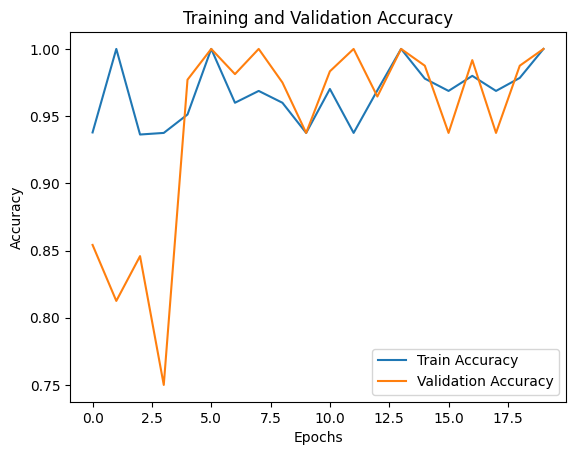

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


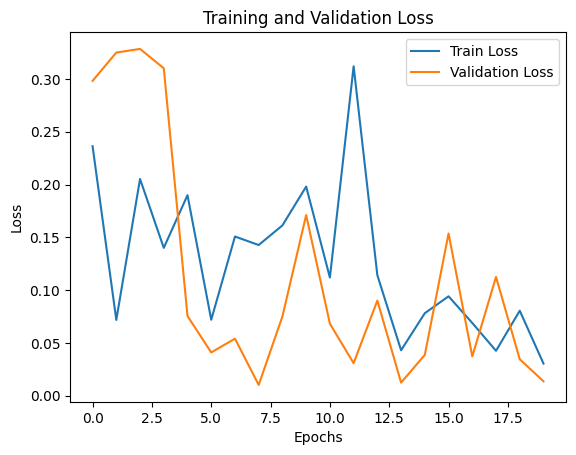

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


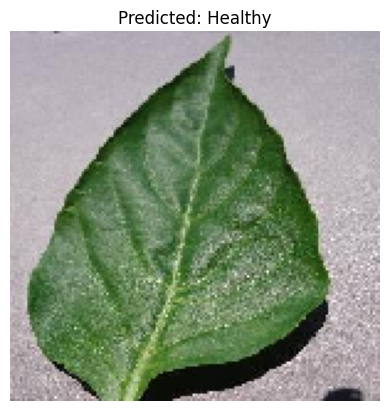

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


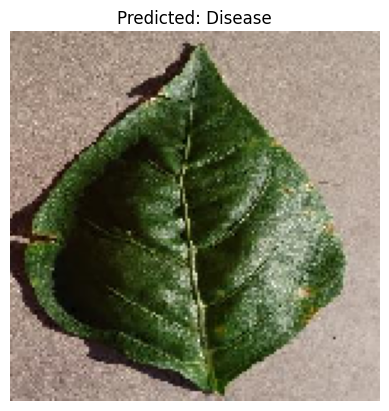

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


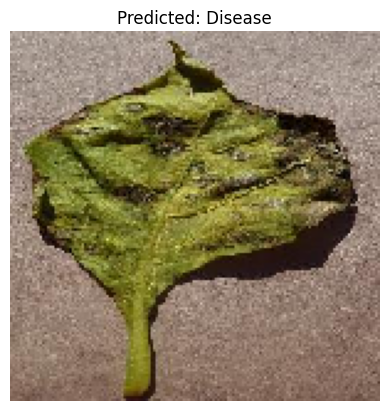

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


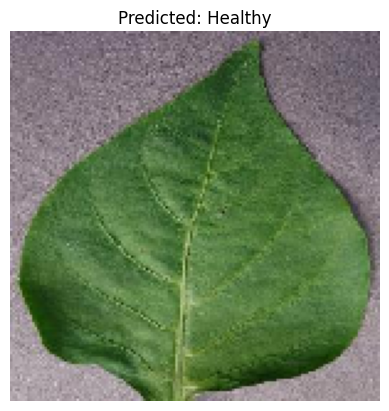

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


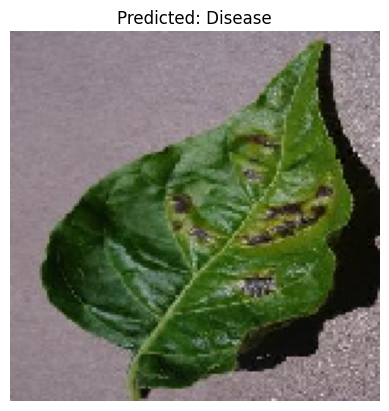

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Get some sample images and predictions
for i in range(5):
    index = random.randint(0, len(test_generator.filenames) - 1)
    img_path = os.path.join(test_dir, test_generator.filenames[index])

    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = 'Healthy' if prediction[0][0] > 0.5 else 'Disease'

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()
